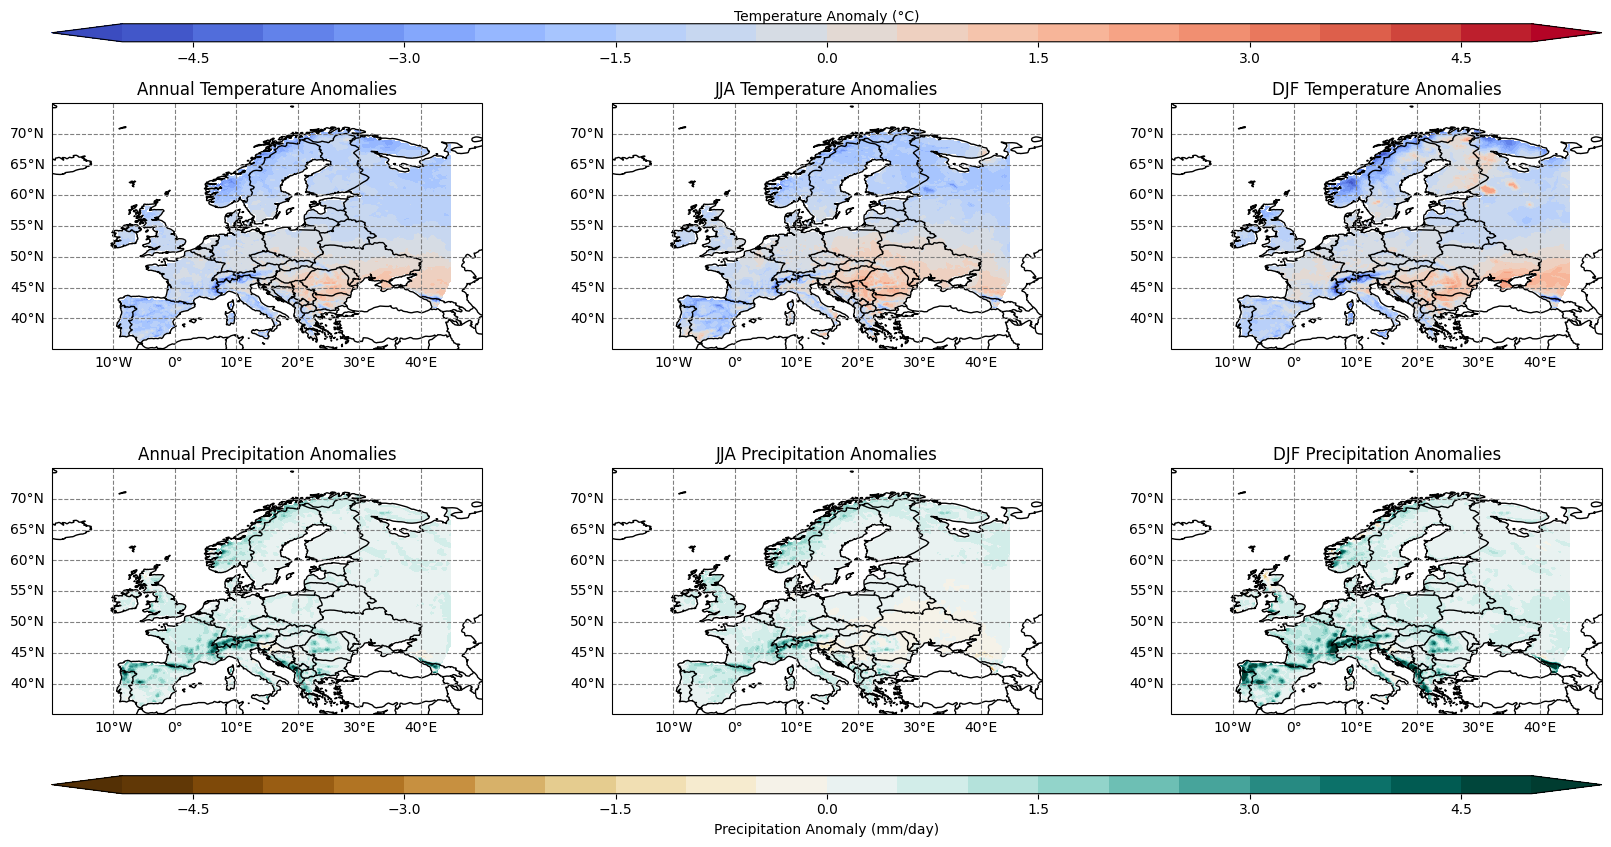

In [1]:
import xarray as xr
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import matplotlib.gridspec as gridspec

# Define a function to process and calculate anomalies (for temperature and precipitation)
def calculate_anomalies(historical_file, baseline_file, variable):
    # Load the historical simulation data
    historical_data = xr.open_dataset(historical_file)
    historical_var = historical_data[variable]  # Use 'tas' for temperature, 'pr' for precipitation

    # Load the baseline observation data
    observations_data = xr.open_dataset(baseline_file)
    observations_var = observations_data[variable]

    # Flatten the lat/lon grids of the observations
    obs_lon, obs_lat = np.meshgrid(observations_var.lon, observations_var.lat)
    obs_points = np.array([obs_lon.flatten(), obs_lat.flatten()]).T
    obs_values = observations_var.values.flatten()

    # Interpolate observations to the historical grid using SciPy's griddata
    historical_lon, historical_lat = np.meshgrid(historical_var.lon, historical_var.lat)
    historical_points = np.array([historical_lon.flatten(), historical_lat.flatten()]).T
    interpolated_obs = interp.griddata(obs_points, obs_values, (historical_lon, historical_lat), method='linear')

    # Subtract the interpolated observations from the historical model data
    anomalies = historical_var.values - interpolated_obs

    # Convert the result back into an xarray DataArray
    anomalies_da = xr.DataArray(anomalies, dims=['lat', 'lon'], coords={'lat': historical_var.lat, 'lon': historical_var.lon})
    return anomalies_da

# Files for Annual, JJA, DJF for temperature (tas) and precipitation (pr)
data_files_temperature = [
    ('Annual.nc', 'Baseline Annual.nc'),
    ('JJA.nc', 'Baseline JJA.nc'),
    ('DJF.nc', 'Baseline DJF.nc')
]

data_files_precipitation = [
    ('Annual1.nc', 'Baseline Annual1.nc'),
    ('JJA1.nc', 'Baseline JJA1.nc'),
    ('DJF1.nc', 'Baseline DJF1.nc')
]

# Set up the figure and GridSpec layout with colorbars at the top and bottom
fig = plt.figure(figsize=(20, 10))  # Reduced the figure height
gs = gridspec.GridSpec(4, 3, height_ratios=[0.05, 1, 1, 0.05], wspace=0.3, hspace=0.02)  # Reduced hspace to minimum

# Create axes for the 3 temperature and 3 precipitation plots
axes_temperature = [fig.add_subplot(gs[1, i], projection=ccrs.PlateCarree()) for i in range(3)]
axes_precipitation = [fig.add_subplot(gs[2, i], projection=ccrs.PlateCarree()) for i in range(3)]

# Set colormap and normalization with white at 0 for temperature
cmap_temp = plt.get_cmap('coolwarm')
norm_temp = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Set colormap and normalization with white at 0 for precipitation
cmap_prec = plt.get_cmap('BrBG')
norm_prec = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Titles for temperature and precipitation subplots
titles_temperature = ['Annual Temperature Anomalies', 'JJA Temperature Anomalies', 'DJF Temperature Anomalies']
titles_precipitation = ['Annual Precipitation Anomalies', 'JJA Precipitation Anomalies', 'DJF Precipitation Anomalies']

# Loop through the data files and axes to plot temperature anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_temperature):
    # Calculate temperature anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'tas')

    # Plot the temperature anomalies on the i-th axis
    contour_temp = axes_temperature[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_temp, norm=norm_temp, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_temperature[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_temperature[i].coastlines()
    axes_temperature[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_temperature[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_temperature[i].set_title(titles_temperature[i])

# Loop through the data files and axes to plot precipitation anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_precipitation):
    # Calculate precipitation anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'pr')

    # Plot the precipitation anomalies on the i-th axis
    contour_prec = axes_precipitation[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_prec, norm=norm_prec, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_precipitation[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_precipitation[i].coastlines()
    axes_precipitation[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_precipitation[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_precipitation[i].set_title(titles_precipitation[i])

# Add a horizontal colorbar for temperature at the top
cbar_ax_temp = fig.add_subplot(gs[0, :])  # Space for the temperature colorbar across the top
cbar_temp = fig.colorbar(contour_temp, cax=cbar_ax_temp, orientation='horizontal', shrink=0.8, pad=0.2)
cbar_temp.set_label('Temperature Anomaly (°C)', labelpad=-40)  # Position the label above the color bar

# Add a horizontal colorbar for precipitation at the bottom
cbar_ax_prec = fig.add_subplot(gs[3, :])  # Space for the precipitation colorbar across the bottom
cbar_prec = fig.colorbar(contour_prec, cax=cbar_ax_prec, orientation='horizontal', label='Precipitation Anomaly (mm/day)', shrink=0.8, pad=0.2)

# Save the figure as a high-quality PNG image
output_filepath = 'high_quality_plot.png'  # Specify the file name and path
plt.savefig(output_filepath, dpi=300, bbox_inches='tight')  # Save with high resolution and tight layout

# Display the plot
plt.show()


In [2]:
nknimport xarray as xr
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import matplotlib.gridspec as gridspec

# Define a function to process and calculate anomalies (for temperature and precipitation)
def calculate_anomalies(historical_file, baseline_file, variable):
    # Load the historical simulation data
    historical_data = xr.open_dataset(historical_file)
    historical_var = historical_data[variable]  # Use 'tas' for temperature, 'pr' for precipitation

    # Load the baseline observation data
    observations_data = xr.open_dataset(baseline_file)
    observations_var = observations_data[variable]

    # Flatten the lat/lon grids of the observations
    obs_lon, obs_lat = np.meshgrid(observations_var.lon, observations_var.lat)
    obs_points = np.array([obs_lon.flatten(), obs_lat.flatten()]).T
    obs_values = observations_var.values.flatten()

    # Interpolate observations to the historical grid using SciPy's griddata
    historical_lon, historical_lat = np.meshgrid(historical_var.lon, historical_var.lat)
    historical_points = np.array([historical_lon.flatten(), historical_lat.flatten()]).T
    interpolated_obs = interp.griddata(obs_points, obs_values, (historical_lon, historical_lat), method='linear')

    # Subtract the interpolated observations from the historical model data
    anomalies = historical_var.values - interpolated_obs

    # Convert the result back into an xarray DataArray
    anomalies_da = xr.DataArray(anomalies, dims=['lat', 'lon'], coords={'lat': historical_var.lat, 'lon': historical_var.lon})
    return anomalies_da

# Files for Annual, JJA, DJF for temperature (tas) and precipitation (pr)
data_files_temperature = [
    ('Annual.nc', 'Baseline Annual.nc'),
    ('JJA.nc', 'Baseline JJA.nc'),
    ('DJF.nc', 'Baseline DJF.nc')
]

data_files_precipitation = [
    ('Annual1.nc', 'Baseline Annual1.nc'),
    ('JJA1.nc', 'Baseline JJA1.nc'),
    ('DJF1.nc', 'Baseline DJF1.nc')
]

# Set up the figure and GridSpec layout with colorbars at the top and bottom
fig = plt.figure(figsize=(20, 10))  # Reduced the figure height
gs = gridspec.GridSpec(4, 3, height_ratios=[0.05, 1, 1, 0.05], wspace=0.3, hspace=0.02)  # Reduced hspace to minimum

# Create axes for the 3 temperature and 3 precipitation plots
axes_temperature = [fig.add_subplot(gs[1, i], projection=ccrs.PlateCarree()) for i in range(3)]
axes_precipitation = [fig.add_subplot(gs[2, i], projection=ccrs.PlateCarree()) for i in range(3)]

# Set colormap and normalization with white at 0 for temperature
cmap_temp = plt.get_cmap('coolwarm')
norm_temp = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Set colormap and normalization with white at 0 for precipitation
cmap_prec = plt.get_cmap('BrBG')
norm_prec = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Titles for temperature and precipitation subplots
titles_temperature = ['Annual Temperature Anomalies', 'JJA Temperature Anomalies', 'DJF Temperature Anomalies']
titles_precipitation = ['Annual Precipitation Anomalies', 'JJA Precipitation Anomalies', 'DJF Precipitation Anomalies']

# Loop through the data files and axes to plot temperature anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_temperature):
    # Calculate temperature anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'tas')

    # Plot the temperature anomalies on the i-th axis
    contour_temp = axes_temperature[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_temp, norm=norm_temp, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_temperature[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_temperature[i].coastlines()
    axes_temperature[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_temperature[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_temperature[i].set_title(titles_temperature[i])

# Loop through the data files and axes to plot precipitation anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_precipitation):
    # Calculate precipitation anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'pr')

    # Plot the precipitation anomalies on the i-th axis
    contour_prec = axes_precipitation[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_prec, norm=norm_prec, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_precipitation[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_precipitation[i].coastlines()
    axes_precipitation[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_precipitation[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_precipitation[i].set_title(titles_precipitation[i])

# Add a horizontal colorbar for temperature at the top
cbar_ax_temp = fig.add_subplot(gs[0, :])  # Space for the temperature colorbar across the top
cbar_temp = fig.colorbar(contour_temp, cax=cbar_ax_temp, orientation='horizontal', label='Temperature Anomaly (°C)', shrink=0.8, pad=0.2)

# Add a horizontal colorbar for precipitation at the bottom
cbar_ax_prec = fig.add_subplot(gs[3, :])  # Space for the precipitation colorbar across the bottom
cbar_prec = fig.colorbar(contour_prec, cax=cbar_ax_prec, orientation='horizontal', label='Precipitation Anomaly (mm/day)', shrink=0.8, pad=0.2)

# Display the plot
plt.show()


SyntaxError: invalid syntax (3926695967.py, line 1)

**Best one with horizontal bars**

In [ ]:
import xarray as xr
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import matplotlib.gridspec as gridspec

# Define a function to process and calculate anomalies (for temperature and precipitation)
def calculate_anomalies(historical_file, baseline_file, variable):
    # Load the historical simulation data
    historical_data = xr.open_dataset(historical_file)
    historical_var = historical_data[variable]  # Use 'tas' for temperature, 'pr' for precipitation

    # Load the baseline observation data
    observations_data = xr.open_dataset(baseline_file)
    observations_var = observations_data[variable]

    # Flatten the lat/lon grids of the observations
    obs_lon, obs_lat = np.meshgrid(observations_var.lon, observations_var.lat)
    obs_points = np.array([obs_lon.flatten(), obs_lat.flatten()]).T
    obs_values = observations_var.values.flatten()

    # Interpolate observations to the historical grid using SciPy's griddata
    historical_lon, historical_lat = np.meshgrid(historical_var.lon, historical_var.lat)
    historical_points = np.array([historical_lon.flatten(), historical_lat.flatten()]).T
    interpolated_obs = interp.griddata(obs_points, obs_values, (historical_lon, historical_lat), method='linear')

    # Subtract the interpolated observations from the historical model data
    anomalies = historical_var.values - interpolated_obs

    # Convert the result back into an xarray DataArray
    anomalies_da = xr.DataArray(anomalies, dims=['lat', 'lon'], coords={'lat': historical_var.lat, 'lon': historical_var.lon})
    return anomalies_da

# Files for Annual, JJA, DJF for temperature (tas) and precipitation (pr)
data_files_temperature = [
    ('Annual.nc', 'Baseline Annual.nc'),
    ('JJA.nc', 'Baseline JJA.nc'),
    ('DJF.nc', 'Baseline DJF.nc')
]

data_files_precipitation = [
    ('Annual1.nc', 'Baseline Annual1.nc'),
    ('JJA1.nc', 'Baseline JJA1.nc'),
    ('DJF1.nc', 'Baseline DJF1.nc')
]

# Set up the figure and GridSpec layout with colorbars at the top and bottom
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(4, 3, height_ratios=[0.05, 1, 1, 0.05], wspace=0.3, hspace=0.3)

# Create axes for the 3 temperature and 3 precipitation plots
axes_temperature = [fig.add_subplot(gs[1, i], projection=ccrs.PlateCarree()) for i in range(3)]
axes_precipitation = [fig.add_subplot(gs[2, i], projection=ccrs.PlateCarree()) for i in range(3)]

# Set colormap and normalization with white at 0 for temperature
cmap_temp = plt.get_cmap('coolwarm')
norm_temp = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Set colormap and normalization with white at 0 for precipitation
cmap_prec = plt.get_cmap('BrBG')
norm_prec = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Titles for temperature and precipitation subplots
titles_temperature = ['Annual Temperature Anomalies', 'JJA Temperature Anomalies', 'DJF Temperature Anomalies']
titles_precipitation = ['Annual Precipitation Anomalies', 'JJA Precipitation Anomalies', 'DJF Precipitation Anomalies']

# Loop through the data files and axes to plot temperature anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_temperature):
    # Calculate temperature anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'tas')

    # Plot the temperature anomalies on the i-th axis
    contour_temp = axes_temperature[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_temp, norm=norm_temp, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_temperature[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_temperature[i].coastlines()
    axes_temperature[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_temperature[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_temperature[i].set_title(titles_temperature[i])

# Loop through the data files and axes to plot precipitation anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_precipitation):
    # Calculate precipitation anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'pr')

    # Plot the precipitation anomalies on the i-th axis
    contour_prec = axes_precipitation[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_prec, norm=norm_prec, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_precipitation[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_precipitation[i].coastlines()
    axes_precipitation[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_precipitation[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_precipitation[i].set_title(titles_precipitation[i])

# Add a horizontal colorbar for temperature at the top
cbar_ax_temp = fig.add_subplot(gs[0, :])  # Space for the temperature colorbar across the top
cbar_temp = fig.colorbar(contour_temp, cax=cbar_ax_temp, orientation='horizontal', label='Temperature Anomaly (°C)', shrink=0.8, pad=0.2)

# Add a horizontal colorbar for precipitation at the bottom
cbar_ax_prec = fig.add_subplot(gs[3, :])  # Space for the precipitation colorbar across the bottom
cbar_prec = fig.colorbar(contour_prec, cax=cbar_ax_prec, orientation='horizontal', label='Precipitation Anomaly (mm/day)', shrink=0.8, pad=0.2)

# Display the plot
plt.show()


**Best one so far**

In [ ]:
m,mimport xarray as xr
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import matplotlib.gridspec as gridspec

# Define a function to process and calculate anomalies (for temperature and precipitation)
def calculate_anomalies(historical_file, baseline_file, variable):
    # Load the historical simulation data
    historical_data = xr.open_dataset(historical_file)
    historical_var = historical_data[variable]  # Use 'tas' for temperature, 'pr' for precipitation

    # Load the baseline observation data
    observations_data = xr.open_dataset(baseline_file)
    observations_var = observations_data[variable]

    # Flatten the lat/lon grids of the observations
    obs_lon, obs_lat = np.meshgrid(observations_var.lon, observations_var.lat)
    obs_points = np.array([obs_lon.flatten(), obs_lat.flatten()]).T
    obs_values = observations_var.values.flatten()

    # Interpolate observations to the historical grid using SciPy's griddata
    historical_lon, historical_lat = np.meshgrid(historical_var.lon, historical_var.lat)
    historical_points = np.array([historical_lon.flatten(), historical_lat.flatten()]).T
    interpolated_obs = interp.griddata(obs_points, obs_values, (historical_lon, historical_lat), method='linear')

    # Subtract the interpolated observations from the historical model data
    anomalies = historical_var.values - interpolated_obs

    # Convert the result back into an xarray DataArray
    anomalies_da = xr.DataArray(anomalies, dims=['lat', 'lon'], coords={'lat': historical_var.lat, 'lon': historical_var.lon})
    return anomalies_da

# Files for Annual, JJA, DJF for temperature (tas) and precipitation (pr)
data_files_temperature = [
    ('Annual.nc', 'Baseline Annual.nc'),
    ('JJA.nc', 'Baseline JJA.nc'),
    ('DJF.nc', 'Baseline DJF.nc')
]

data_files_precipitation = [
    ('Annual1.nc', 'Baseline Annual1.nc'),
    ('JJA1.nc', 'Baseline JJA1.nc'),
    ('DJF1.nc', 'Baseline DJF1.nc')
]

# Set up the figure and GridSpec layout with two rows and space for colorbars
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05], height_ratios=[1, 1], wspace=0.3, hspace=0.3)

# Create axes for the 3 temperature and 3 precipitation plots
axes_temperature = [fig.add_subplot(gs[0, i], projection=ccrs.PlateCarree()) for i in range(3)]
axes_precipitation = [fig.add_subplot(gs[1, i], projection=ccrs.PlateCarree()) for i in range(3)]

# Set colormap and normalization with white at 0 for temperature
cmap_temp = plt.get_cmap('coolwarm')
norm_temp = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Set colormap and normalization with white at 0 for precipitation
cmap_prec = plt.get_cmap('BrBG')
norm_prec = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Titles for temperature and precipitation subplots
titles_temperature = ['Annual Temperature Anomalies', 'JJA Temperature Anomalies', 'DJF Temperature Anomalies']
titles_precipitation = ['Annual Precipitation Anomalies', 'JJA Precipitation Anomalies', 'DJF Precipitation Anomalies']

# Loop through the data files and axes to plot temperature anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_temperature):
    # Calculate temperature anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'tas')

    # Plot the temperature anomalies on the i-th axis
    contour = axes_temperature[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_temp, norm=norm_temp, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_temperature[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_temperature[i].coastlines()
    axes_temperature[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_temperature[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_temperature[i].set_title(titles_temperature[i])

# Loop through the data files and axes to plot precipitation anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_precipitation):
    # Calculate precipitation anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'pr')

    # Plot the precipitation anomalies on the i-th axis
    contour = axes_precipitation[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_prec, norm=norm_prec, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_precipitation[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_precipitation[i].coastlines()
    axes_precipitation[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_precipitation[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_precipitation[i].set_title(titles_precipitation[i])

# Add a colorbar for temperature (first row)
cbar_ax_temp = fig.add_subplot(gs[0, 3])  # Space for the temperature colorbar
cbar_temp = fig.colorbar(contour, cax=cbar_ax_temp, orientation='vertical', label='Temperature Anomaly (°C)')
cbar_temp.set_ticks(np.arange(-5, 6, 1))

# Add a colorbar for precipitation (second row)
cbar_ax_prec = fig.add_subplot(gs[1, 3])  # Space for the precipitation colorbar
cbar_prec = fig.colorbar(contour, cax=cbar_ax_prec, orientation='vertical', label='Precipitation Anomaly (mm/day)')
cbar_prec.set_ticks(np.arange(-5, 6, 1))

# Display the plot
plt.show()

In [ ]:
nmnsimport xarray as xr
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import matplotlib.gridspec as gridspec

# Define a function to process and calculate anomalies (for temperature and precipitation)
def calculate_anomalies(historical_file, baseline_file, variable):
    # Load the historical simulation data
    historical_data = xr.open_dataset(historical_file)
    historical_var = historical_data[variable]  # Use 'tas' for temperature, 'pr' for precipitation

    # Load the baseline observation data
    observations_data = xr.open_dataset(baseline_file)
    observations_var = observations_data[variable]

    # Flatten the lat/lon grids of the observations
    obs_lon, obs_lat = np.meshgrid(observations_var.lon, observations_var.lat)
    obs_points = np.array([obs_lon.flatten(), obs_lat.flatten()]).T
    obs_values = observations_var.values.flatten()

    # Interpolate observations to the historical grid using SciPy's griddata
    historical_lon, historical_lat = np.meshgrid(historical_var.lon, historical_var.lat)
    historical_points = np.array([historical_lon.flatten(), historical_lat.flatten()]).T
    interpolated_obs = interp.griddata(obs_points, obs_values, (historical_lon, historical_lat), method='linear')

    # Subtract the interpolated observations from the historical model data
    anomalies = historical_var.values - interpolated_obs

    # Convert the result back into an xarray DataArray
    anomalies_da = xr.DataArray(anomalies, dims=['lat', 'lon'], coords={'lat': historical_var.lat, 'lon': historical_var.lon})
    return anomalies_da

# Files for Annual, JJA, DJF for temperature (tas) and precipitation (pr)
data_files_temperature = [
    ('Annual.nc', 'Baseline Annual.nc'),
    ('JJA.nc', 'Baseline JJA.nc'),
    ('DJF.nc', 'Baseline DJF.nc')
]

data_files_precipitation = [
    ('Annual1.nc', 'Baseline Annual1.nc'),
    ('JJA1.nc', 'Baseline JJA1.nc'),
    ('DJF1.nc', 'Baseline DJF1.nc')
]

# Set up the figure and GridSpec layout with temperature color bar on the far left and precipitation color bar on the far right
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(2, 5, width_ratios=[0.05, 1, 1, 1, 0.05], height_ratios=[1, 1], wspace=0.3, hspace=0.05)  # Reduced hspace to bring rows closer together

# Create axes for the 3 temperature and 3 precipitation plots
axes_temperature = [fig.add_subplot(gs[0, i+1], projection=ccrs.PlateCarree()) for i in range(3)]
axes_precipitation = [fig.add_subplot(gs[1, i+1], projection=ccrs.PlateCarree()) for i in range(3)]

# Set colormap and normalization with white at 0 for temperature
cmap_temp = plt.get_cmap('coolwarm')
norm_temp = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Set colormap and normalization with white at 0 for precipitation
cmap_prec = plt.get_cmap('BrBG')
norm_prec = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Titles for temperature and precipitation subplots
titles_temperature = ['Annual Temperature Anomalies', 'JJA Temperature Anomalies', 'DJF Temperature Anomalies']
titles_precipitation = ['Annual Precipitation Anomalies', 'JJA Precipitation Anomalies', 'DJF Precipitation Anomalies']

# Loop through the data files and axes to plot temperature anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_temperature):
    # Calculate temperature anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'tas')

    # Plot the temperature anomalies on the i-th axis
    contour_temp = axes_temperature[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_temp, norm=norm_temp, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_temperature[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_temperature[i].coastlines()
    axes_temperature[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_temperature[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_temperature[i].set_title(titles_temperature[i])

# Loop through the data files and axes to plot precipitation anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_precipitation):
    # Calculate precipitation anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'pr')

    # Plot the precipitation anomalies on the i-th axis
    contour_prec = axes_precipitation[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_prec, norm=norm_prec, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_precipitation[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_precipitation[i].coastlines()
    axes_precipitation[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_precipitation[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_precipitation[i].set_title(titles_precipitation[i])

# Add a vertical colorbar for temperature on the far left
cbar_ax_temp = fig.add_subplot(gs[0, 0])  # Space for the temperature colorbar on the far left
cbar_temp = fig.colorbar(contour_temp, cax=cbar_ax_temp, orientation='vertical', label='Temperature Anomaly (°C)', shrink=0.8)
cbar_temp.set_ticks(np.arange(-5, 6, 1))

# Add a vertical colorbar for precipitation on the far right
cbar_ax_prec = fig.add_subplot(gs[1, 4])  # Space for the precipitation colorbar on the far right
cbar_prec = fig.colorbar(contour_prec, cax=cbar_ax_prec, orientation='vertical', label='Precipitation Anomaly (mm/day)', shrink=0.8)
cbar_prec.set_ticks(np.arange(-5, 6, 1))

# Display the plot
plt.show()


In [ ]:
hjdimport xarray as xr
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import matplotlib.gridspec as gridspec

# Define a function to process and calculate anomalies (for temperature and precipitation)
def calculate_anomalies(historical_file, baseline_file, variable):
    # Load the historical simulation data
    historical_data = xr.open_dataset(historical_file)
    historical_var = historical_data[variable]  # Use 'tas' for temperature, 'pr' for precipitation

    # Load the baseline observation data
    observations_data = xr.open_dataset(baseline_file)
    observations_var = observations_data[variable]

    # Flatten the lat/lon grids of the observations
    obs_lon, obs_lat = np.meshgrid(observations_var.lon, observations_var.lat)
    obs_points = np.array([obs_lon.flatten(), obs_lat.flatten()]).T
    obs_values = observations_var.values.flatten()

    # Interpolate observations to the historical grid using SciPy's griddata
    historical_lon, historical_lat = np.meshgrid(historical_var.lon, historical_var.lat)
    historical_points = np.array([historical_lon.flatten(), historical_lat.flatten()]).T
    interpolated_obs = interp.griddata(obs_points, obs_values, (historical_lon, historical_lat), method='linear')

    # Subtract the interpolated observations from the historical model data
    anomalies = historical_var.values - interpolated_obs

    # Convert the result back into an xarray DataArray
    anomalies_da = xr.DataArray(anomalies, dims=['lat', 'lon'], coords={'lat': historical_var.lat, 'lon': historical_var.lon})
    return anomalies_da

# Files for Annual, JJA, DJF for temperature (tas) and precipitation (pr)
data_files_temperature = [
    ('Annual.nc', 'Baseline Annual.nc'),
    ('JJA.nc', 'Baseline JJA.nc'),
    ('DJF.nc', 'Baseline DJF.nc')
]

data_files_precipitation = [
    ('Annual1.nc', 'Baseline Annual1.nc'),
    ('JJA1.nc', 'Baseline JJA1.nc'),
    ('DJF1.nc', 'Baseline DJF1.nc')
]

# Set up the figure and GridSpec layout with temperature color bar on the far left and precipitation color bar on the far right
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(2, 5, width_ratios=[0.05, 1, 1, 1, 0.05], height_ratios=[1, 1], wspace=0.3, hspace=0.3)

# Create axes for the 3 temperature and 3 precipitation plots
axes_temperature = [fig.add_subplot(gs[0, i+1], projection=ccrs.PlateCarree()) for i in range(3)]
axes_precipitation = [fig.add_subplot(gs[1, i+1], projection=ccrs.PlateCarree()) for i in range(3)]

# Set colormap and normalization with white at 0 for temperature
cmap_temp = plt.get_cmap('coolwarm')
norm_temp = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Set colormap and normalization with white at 0 for precipitation
cmap_prec = plt.get_cmap('BrBG')
norm_prec = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Titles for temperature and precipitation subplots
titles_temperature = ['Annual Temperature Anomalies', 'JJA Temperature Anomalies', 'DJF Temperature Anomalies']
titles_precipitation = ['Annual Precipitation Anomalies', 'JJA Precipitation Anomalies', 'DJF Precipitation Anomalies']

# Loop through the data files and axes to plot temperature anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_temperature):
    # Calculate temperature anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'tas')

    # Plot the temperature anomalies on the i-th axis
    contour_temp = axes_temperature[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_temp, norm=norm_temp, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_temperature[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_temperature[i].coastlines()
    axes_temperature[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_temperature[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_temperature[i].set_title(titles_temperature[i])

# Loop through the data files and axes to plot precipitation anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_precipitation):
    # Calculate precipitation anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'pr')

    # Plot the precipitation anomalies on the i-th axis
    contour_prec = axes_precipitation[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_prec, norm=norm_prec, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_precipitation[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_precipitation[i].coastlines()
    axes_precipitation[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_precipitation[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_precipitation[i].set_title(titles_precipitation[i])

# Add a vertical colorbar for temperature on the far left
cbar_ax_temp = fig.add_subplot(gs[0, 0])  # Space for the temperature colorbar on the far left
cbar_temp = fig.colorbar(contour_temp, cax=cbar_ax_temp, orientation='vertical', label='Temperature Anomaly (°C)', shrink=0.8)
cbar_temp.set_ticks(np.arange(-5, 6, 1))

# Add a vertical colorbar for precipitation on the far right
cbar_ax_prec = fig.add_subplot(gs[1, 4])  # Space for the precipitation colorbar on the far right
cbar_prec = fig.colorbar(contour_prec, cax=cbar_ax_prec, orientation='vertical', label='Precipitation Anomaly (mm/day)', shrink=0.8)
cbar_prec.set_ticks(np.arange(-5, 6, 1))

# Display the plot
plt.show()


In [ ]:
nkknkimport xarray as xr
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import matplotlib.gridspec as gridspec

# Define a function to process and calculate anomalies (for temperature and precipitation)
def calculate_anomalies(historical_file, baseline_file, variable):
    # Load the historical simulation data
    historical_data = xr.open_dataset(historical_file)
    historical_var = historical_data[variable]  # Use 'tas' for temperature, 'pr' for precipitation

    # Load the baseline observation data
    observations_data = xr.open_dataset(baseline_file)
    observations_var = observations_data[variable]

    # Flatten the lat/lon grids of the observations
    obs_lon, obs_lat = np.meshgrid(observations_var.lon, observations_var.lat)
    obs_points = np.array([obs_lon.flatten(), obs_lat.flatten()]).T
    obs_values = observations_var.values.flatten()

    # Interpolate observations to the historical grid using SciPy's griddata
    historical_lon, historical_lat = np.meshgrid(historical_var.lon, historical_var.lat)
    historical_points = np.array([historical_lon.flatten(), historical_lat.flatten()]).T
    interpolated_obs = interp.griddata(obs_points, obs_values, (historical_lon, historical_lat), method='linear')

    # Subtract the interpolated observations from the historical model data
    anomalies = historical_var.values - interpolated_obs

    # Convert the result back into an xarray DataArray
    anomalies_da = xr.DataArray(anomalies, dims=['lat', 'lon'], coords={'lat': historical_var.lat, 'lon': historical_var.lon})
    return anomalies_da

# Files for Annual, JJA, DJF for temperature (tas) and precipitation (pr)
data_files_temperature = [
    ('Annual.nc', 'Baseline Annual.nc'),
    ('JJA.nc', 'Baseline JJA.nc'),
    ('DJF.nc', 'Baseline DJF.nc')
]

data_files_precipitation = [
    ('Annual1.nc', 'Baseline Annual1.nc'),
    ('JJA1.nc', 'Baseline JJA1.nc'),
    ('DJF1.nc', 'Baseline DJF1.nc')
]

# Set up the figure and GridSpec layout with two rows and space for colorbars
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05], height_ratios=[1, 1], wspace=0.3, hspace=0.3)

# Create axes for the 3 temperature and 3 precipitation plots
axes_temperature = [fig.add_subplot(gs[0, i], projection=ccrs.PlateCarree()) for i in range(3)]
axes_precipitation = [fig.add_subplot(gs[1, i], projection=ccrs.PlateCarree()) for i in range(3)]

# Set colormap and normalization with white at 0 for temperature
cmap_temp = plt.get_cmap('coolwarm')
norm_temp = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Set colormap and normalization with white at 0 for precipitation
cmap_prec = plt.get_cmap('BrBG')
norm_prec = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Titles for temperature and precipitation subplots
titles_temperature = ['Annual Temperature Anomalies', 'JJA Temperature Anomalies', 'DJF Temperature Anomalies']
titles_precipitation = ['Annual Precipitation Anomalies', 'JJA Precipitation Anomalies', 'DJF Precipitation Anomalies']

# Loop through the data files and axes to plot temperature anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_temperature):
    # Calculate temperature anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'tas')

    # Plot the temperature anomalies on the i-th axis
    contour = axes_temperature[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_temp, norm=norm_temp, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_temperature[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_temperature[i].coastlines()
    axes_temperature[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_temperature[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_temperature[i].set_title(titles_temperature[i])

# Loop through the data files and axes to plot precipitation anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_precipitation):
    # Calculate precipitation anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'pr')

    # Plot the precipitation anomalies on the i-th axis
    contour = axes_precipitation[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_prec, norm=norm_prec, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_precipitation[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_precipitation[i].coastlines()
    axes_precipitation[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_precipitation[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_precipitation[i].set_title(titles_precipitation[i])

# Add a colorbar for temperature (first row)
cbar_ax_temp = fig.add_subplot(gs[0, 3])  # Space for the temperature colorbar
cbar_temp = fig.colorbar(contour, cax=cbar_ax_temp, orientation='vertical', label='Temperature Anomaly (°C)')
cbar_temp.set_ticks(np.arange(-5, 6, 1))

# Add a colorbar for precipitation (second row)
cbar_ax_prec = fig.add_subplot(gs[1, 3])  # Space for the precipitation colorbar
cbar_prec = fig.colorbar(contour, cax=cbar_ax_prec, orientation='vertical', label='Precipitation Anomaly (mm/day)')
cbar_prec.set_ticks(np.arange(-5, 6, 1))

# Display the plot
plt.show()

In [ ]:
dsdsimport xarray as xr
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import matplotlib.gridspec as gridspec

# Define a function to process and calculate anomalies (for temperature and precipitation)
def calculate_anomalies(historical_file, baseline_file, variable):
    # Load the historical simulation data
    historical_data = xr.open_dataset(historical_file)
    historical_var = historical_data[variable]  # Use 'tas' for temperature, 'pr' for precipitation

    # Load the baseline observation data
    observations_data = xr.open_dataset(baseline_file)
    observations_var = observations_data[variable]

    # Flatten the lat/lon grids of the observations
    obs_lon, obs_lat = np.meshgrid(observations_var.lon, observations_var.lat)
    obs_points = np.array([obs_lon.flatten(), obs_lat.flatten()]).T
    obs_values = observations_var.values.flatten()

    # Interpolate observations to the historical grid using SciPy's griddata
    historical_lon, historical_lat = np.meshgrid(historical_var.lon, historical_var.lat)
    historical_points = np.array([historical_lon.flatten(), historical_lat.flatten()]).T
    interpolated_obs = interp.griddata(obs_points, obs_values, (historical_lon, historical_lat), method='linear')

    # Subtract the interpolated observations from the historical model data
    anomalies = historical_var.values - interpolated_obs

    # Convert the result back into an xarray DataArray
    anomalies_da = xr.DataArray(anomalies, dims=['lat', 'lon'], coords={'lat': historical_var.lat, 'lon': historical_var.lon})
    return anomalies_da

# Files for Annual, JJA, DJF for temperature (tas) and precipitation (pr)
data_files_temperature = [
    ('Annual.nc', 'Baseline Annual.nc'),
    ('JJA.nc', 'Baseline JJA.nc'),
    ('DJF.nc', 'Baseline DJF.nc')
]

data_files_precipitation = [
    ('Annual1.nc', 'Baseline Annual1.nc'),
    ('JJA1.nc', 'Baseline JJA1.nc'),
    ('DJF1.nc', 'Baseline DJF1.nc')
]

# Set up the figure and GridSpec layout with two rows and space for colorbars
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05], height_ratios=[1, 1], wspace=0.3, hspace=0.05)  # Reduced hspace to make rows closer

# Create axes for the 3 temperature and 3 precipitation plots
axes_temperature = [fig.add_subplot(gs[0, i], projection=ccrs.PlateCarree()) for i in range(3)]
axes_precipitation = [fig.add_subplot(gs[1, i], projection=ccrs.PlateCarree()) for i in range(3)]

# Set colormap and normalization with white at 0 for temperature
cmap_temp = plt.get_cmap('coolwarm')
norm_temp = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Set colormap and normalization with white at 0 for precipitation
cmap_prec = plt.get_cmap('BrBG')
norm_prec = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Titles for temperature and precipitation subplots
titles_temperature = ['Annual Temperature Anomalies', 'JJA Temperature Anomalies', 'DJF Temperature Anomalies']
titles_precipitation = ['Annual Precipitation Anomalies', 'JJA Precipitation Anomalies', 'DJF Precipitation Anomalies']

# Loop through the data files and axes to plot temperature anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_temperature):
    # Calculate temperature anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'tas')

    # Plot the temperature anomalies on the i-th axis
    contour = axes_temperature[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_temp, norm=norm_temp, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_temperature[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_temperature[i].coastlines()
    axes_temperature[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_temperature[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_temperature[i].set_title(titles_temperature[i])

# Loop through the data files and axes to plot precipitation anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_precipitation):
    # Calculate precipitation anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'pr')

    # Plot the precipitation anomalies on the i-th axis
    contour = axes_precipitation[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_prec, norm=norm_prec, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_precipitation[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_precipitation[i].coastlines()
    axes_precipitation[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_precipitation[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_precipitation[i].set_title(titles_precipitation[i])

# Add a colorbar for temperature (first row) with smaller size
cbar_ax_temp = fig.add_subplot(gs[0, 3])  # Space for the temperature colorbar
cbar_temp = fig.colorbar(contour, cax=cbar_ax_temp, orientation='vertical', label='Temperature Anomaly (°C)', shrink=0.75)  # Shrink colorbar

# Add a colorbar for precipitation (second row) with smaller size
cbar_ax_prec = fig.add_subplot(gs[1, 3])  # Space for the precipitation colorbar
cbar_prec = fig.colorbar(contour, cax=cbar_ax_prec, orientation='vertical', label='Precipitation Anomaly (mm/day)', shrink=0.75)  # Shrink colorbar

# Display the plot
plt.show()


In [ ]:
kjskjimport xarray as xr
import numpy as np
import scipy.interpolate as interp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import TwoSlopeNorm
import matplotlib.gridspec as gridspec

# Define a function to process and calculate anomalies (for temperature and precipitation)
def calculate_anomalies(historical_file, baseline_file, variable):
    # Load the historical simulation data
    historical_data = xr.open_dataset(historical_file)
    historical_var = historical_data[variable]  # Use 'tas' for temperature, 'pr' for precipitation

    # Load the baseline observation data
    observations_data = xr.open_dataset(baseline_file)
    observations_var = observations_data[variable]

    # Flatten the lat/lon grids of the observations
    obs_lon, obs_lat = np.meshgrid(observations_var.lon, observations_var.lat)
    obs_points = np.array([obs_lon.flatten(), obs_lat.flatten()]).T
    obs_values = observations_var.values.flatten()

    # Interpolate observations to the historical grid using SciPy's griddata
    historical_lon, historical_lat = np.meshgrid(historical_var.lon, historical_var.lat)
    historical_points = np.array([historical_lon.flatten(), historical_lat.flatten()]).T
    interpolated_obs = interp.griddata(obs_points, obs_values, (historical_lon, historical_lat), method='linear')

    # Subtract the interpolated observations from the historical model data
    anomalies = historical_var.values - interpolated_obs

    # Convert the result back into an xarray DataArray
    anomalies_da = xr.DataArray(anomalies, dims=['lat', 'lon'], coords={'lat': historical_var.lat, 'lon': historical_var.lon})
    return anomalies_da

# Files for Annual, JJA, DJF for temperature (tas) and precipitation (pr)
data_files_temperature = [
    ('Annual.nc', 'Baseline Annual.nc'),
    ('JJA.nc', 'Baseline JJA.nc'),
    ('DJF.nc', 'Baseline DJF.nc')
]

data_files_precipitation = [
    ('Annual1.nc', 'Baseline Annual1.nc'),
    ('JJA1.nc', 'Baseline JJA1.nc'),
    ('DJF1.nc', 'Baseline DJF1.nc')
]

# Set up the figure and GridSpec layout with two rows and space for colorbars
fig = plt.figure(figsize=(20, 16))
gs = gridspec.GridSpec(2, 4, width_ratios=[1, 1, 1, 0.05], height_ratios=[1, 1], wspace=0.3, hspace=0.3)

# Create axes for the 3 temperature and 3 precipitation plots
axes_temperature = [fig.add_subplot(gs[0, i], projection=ccrs.PlateCarree()) for i in range(3)]
axes_precipitation = [fig.add_subplot(gs[1, i], projection=ccrs.PlateCarree()) for i in range(3)]

# Set colormap and normalization with white at 0 for temperature
cmap_temp = plt.get_cmap('coolwarm')
norm_temp = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Set colormap and normalization with white at 0 for precipitation
cmap_prec = plt.get_cmap('BrBG')
norm_prec = TwoSlopeNorm(vmin=-5, vcenter=0, vmax=5)

# Titles for temperature and precipitation subplots
titles_temperature = ['Annual Temperature Anomalies', 'JJA Temperature Anomalies', 'DJF Temperature Anomalies']
titles_precipitation = ['Annual Precipitation Anomalies', 'JJA Precipitation Anomalies', 'DJF Precipitation Anomalies']

# Loop through the data files and axes to plot temperature anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_temperature):
    # Calculate temperature anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'tas')

    # Plot the temperature anomalies on the i-th axis
    contour = axes_temperature[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_temp, norm=norm_temp, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_temperature[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_temperature[i].coastlines()
    axes_temperature[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_temperature[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_temperature[i].set_title(titles_temperature[i])

# Loop through the data files and axes to plot precipitation anomalies
for i, (historical_file, baseline_file) in enumerate(data_files_precipitation):
    # Calculate precipitation anomalies
    anomalies_da = calculate_anomalies(historical_file, baseline_file, 'pr')

    # Plot the precipitation anomalies on the i-th axis
    contour = axes_precipitation[i].contourf(anomalies_da.lon, anomalies_da.lat, anomalies_da, cmap=cmap_prec, norm=norm_prec, levels=np.linspace(-5, 5, 21), extend='both', transform=ccrs.PlateCarree())

    # Set the extent for Europe: longitude from -25 to 45, latitude from 35 to 75
    axes_precipitation[i].set_extent([-20, 50, 35, 75], crs=ccrs.PlateCarree())

    # Add map features
    axes_precipitation[i].coastlines()
    axes_precipitation[i].add_feature(cfeature.BORDERS)

    # Add gridlines for latitude and longitude
    gl = axes_precipitation[i].gridlines(draw_labels=True, linestyle="--", color="gray")
    gl.top_labels = False
    gl.right_labels = False

    # Add title to each subplot
    axes_precipitation[i].set_title(titles_precipitation[i])

# Add a colorbar for temperature (first row)
cbar_ax_temp = fig.add_subplot(gs[0, 3])  # Space for the temperature colorbar
cbar_temp = fig.colorbar(contour, cax=cbar_ax_temp, orientation='vertical', label='Temperature Anomaly (°C)')
cbar_temp.set_ticks(np.arange(-5, 6, 1))

# Add a colorbar for precipitation (second row)
cbar_ax_prec = fig.add_subplot(gs[1, 3])  # Space for the precipitation colorbar
cbar_prec = fig.colorbar(contour, cax=cbar_ax_prec, orientation='vertical', label='Precipitation Anomaly (mm/day)')
cbar_prec.set_ticks(np.arange(-5, 6, 1))

# Display the plot
plt.show()
